# Daily Challenge: Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Visualize

In [33]:
gender_counts = df['Sex'].value_counts()
gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

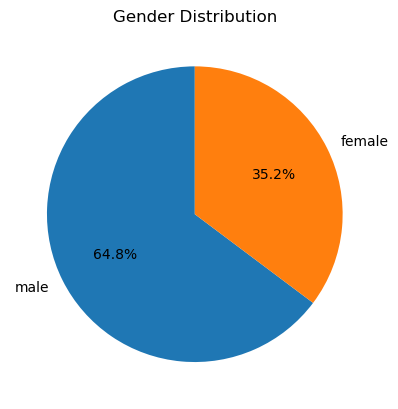

In [34]:
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

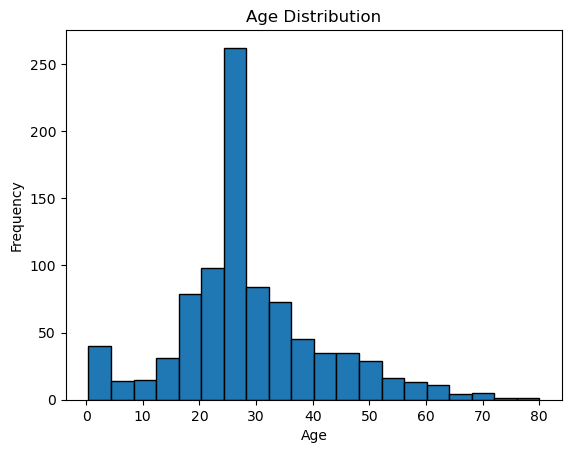

In [25]:
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [35]:
survival_counts = df['Survived'].value_counts()
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

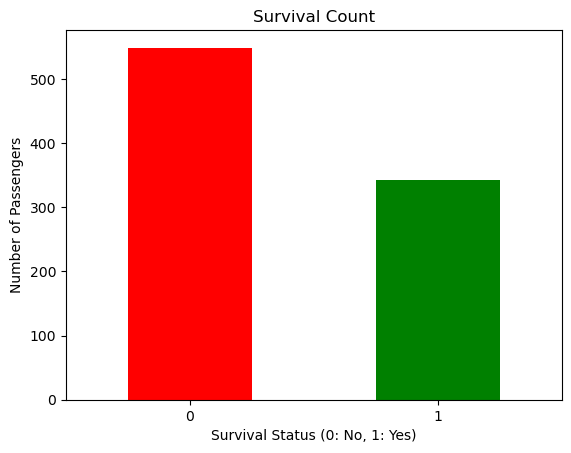

In [36]:
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Survival Status (0: No, 1: Yes)')
plt.ylabel('Number of Passengers')
plt.title('Survival Count')
plt.xticks(rotation=0)
plt.show()

In [37]:
survival_gender = pd.crosstab(df['Survived'], df['Sex'])
survival_gender

Sex,female,male
Survived,,
0,81,468
1,233,109


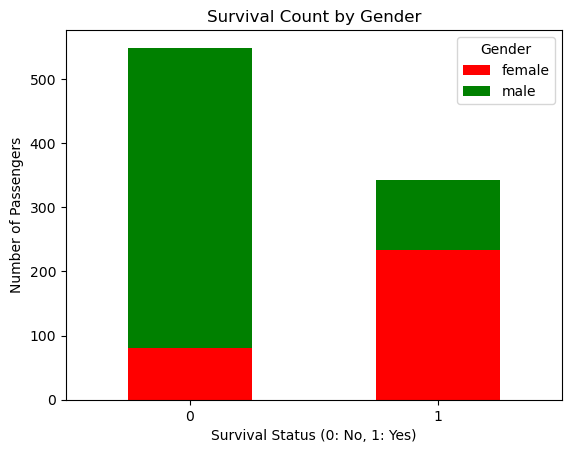

In [38]:
survival_gender.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Survival Status (0: No, 1: Yes)')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Gender')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right')
plt.show()

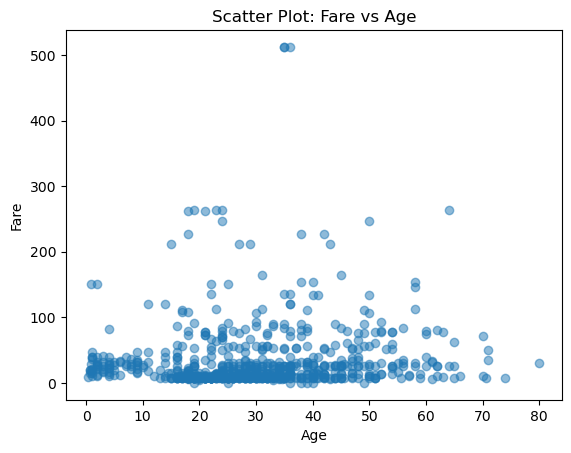

In [39]:
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Fare vs Age')
plt.show()

### Preprocess 

In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [13]:
df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

In [14]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

### Data Analysis

In [15]:
gender_survival_rate = df.groupby('Sex_male')['Survived'].mean()
gender_survival_rate

Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64

In [17]:
class_survival_rate = df.groupby('Pclass')['Survived'].mean()
class_survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [18]:
passenger_highest_fare = df.loc[df['Fare'].idxmax()]
passenger_highest_fare[['Name', 'Fare']]

Name    Ward, Miss. Anna
Fare                 1.0
Name: 258, dtype: object